# Project 7 
Author: Tiffany
https://github.com/Thilde02/datafun-07-ml.git 


In [2]:

import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

CC 7.5 - Chart a Straight Line (Pt 1) 

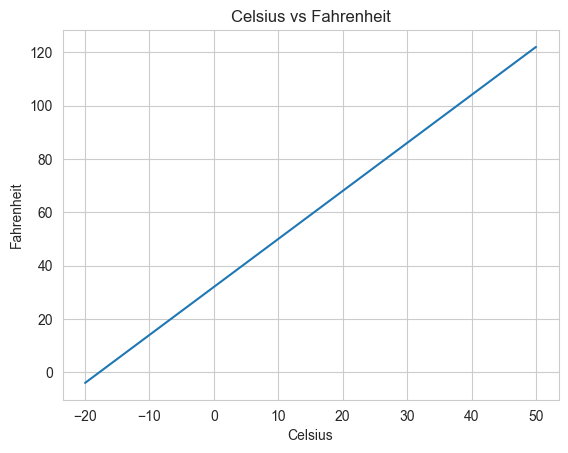

In [19]:
celsius = np.linspace(-20, 50, 100)
fahrenheit = (celsius * 9/5) + 32
df = pd.DataFrame({'Celsius': celsius, 'Fahrenheit': fahrenheit})
sns.lineplot(x='Celsius', y='Fahrenheit', data=df)
plt.title('Celsius vs Fahrenheit')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.show()

CC 7.6 Predict Avg High Temp in NYC - (Pt 2) 

Data Acquisition - Section 1 

In [20]:
nyc_df = pd.read_csv('nyc_temp.csv')

Data Insection - Section 2 

In [7]:
nyc_df.head()

,Date,Value,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


In [8]:
nyc_df.tail()

,Date,Value,Anomaly
119,2014,35.5,-1.9
120,2015,36.1,-1.3
121,2016,40.8,3.4
122,2017,42.8,5.4
123,2018,38.7,1.3


Data Cleaning - Section 3 

In [9]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,18,34.2,-3.2
1,18,34.7,-2.7
2,18,35.5,-1.9


Descriptive Stats - Section 4 

In [10]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

Build the Model - Linear Regression - Section 5 

In [11]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

print("Slope =", linear_regression.slope)
print("Intercept =", linear_regression.intercept)
print("Slope * Year 1850 + Intercept =", linear_regression.slope * 1850 + linear_regression.intercept)
print("Slope * Year 2019 + Intercept =", linear_regression.slope * 2019 + linear_regression.intercept)

Slope = 1.5775539568345327
Intercept = 7.443525179856113
Slope * Year 1850 + Intercept = 2925.9183453237415
Slope * Year 2019 + Intercept = 3192.5249640287775


Predict - Section 6 

In [12]:
linear_regression.slope * 2024 + linear_regression.intercept
print("Slope * Year 2024 + Intercept =", linear_regression.slope * 2024 + linear_regression.intercept)

Slope * Year 2024 + Intercept = 3200.41273381295


Visualization  Section 7 

Y_Limits: (10.0, 70.0)


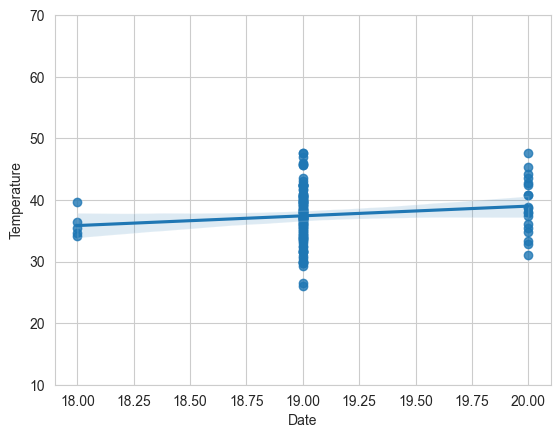

In [13]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
print("Y_Limits:", axes.set_ylim(10, 70))

CC 7.6 Predict Avg High Temp in NYC ( Pt 3) 

Build Model - Section 1 ( pt 3) 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
     nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, 
     random_state=11)

print("X_Train of shape =", X_train.shape)
print("X_Test of shape =", X_test.shape)

X_Train of shape = (93, 1)
X_Test of shape = (31, 1)


Test - Section 2 ( pt 3) 

In [15]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

print("Linear Regression Coefficient =", linear_regression.coef_)
print(f"Linear Regression Intercept =", linear_regression.intercept_)

Linear Regression Coefficient = [1.48389423]
Linear Regression Intercept = 9.271874999999987


 Predict - Section 3 ( pt 3) 

In [17]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

print("1890 Prediction:", predict(1890))
print("2019 Prediction:", predict(2019))
print("2024 Prediction:", predict(2024))

1890 Prediction: [2813.83197115]
2019 Prediction: [3005.25432692]
2024 Prediction: [3012.67379808]


Visuals - Section 4 (Pt 3)

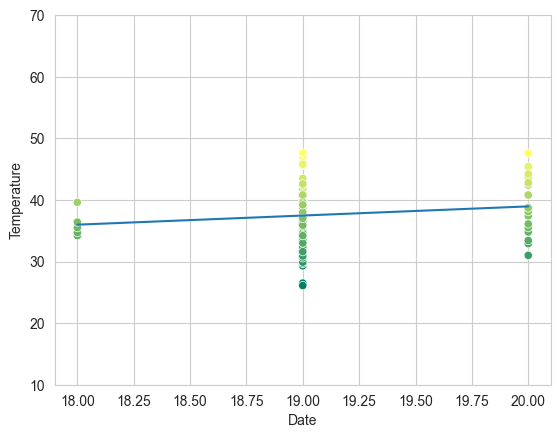

In [18]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
     hue='Temperature', palette='summer', legend=False)

axes.set_ylim(10, 70)
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x, y)

Summary: 